### 이미지 처리

In [2]:
# ! pip install opencv-python

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 흑백 이미지로 로드
image = cv2.imread("c:/workspace3/data/images/plane.jpg", cv2.IMREAD_GRAYSCALE)
#           이미지 읽기

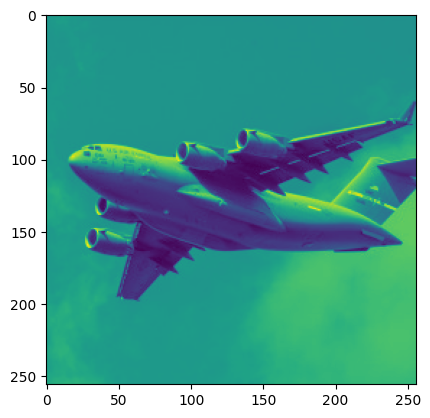

In [30]:
plt.imshow(image)
plt.show()

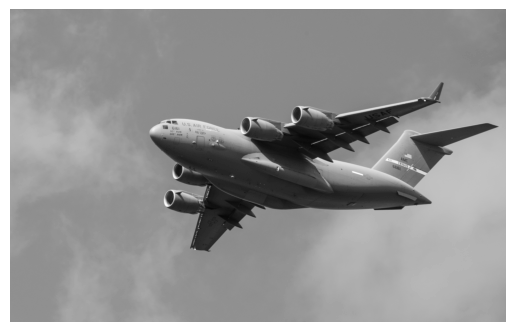

In [5]:
# 이미지를 출력

plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

In [6]:
# 데이터 타입을 확인

type(image)

numpy.ndarray

In [7]:
# 이미지 데이터를 확인

image
# 0     black   > 0
# 255   white   > 1

array([[140, 136, 146, ..., 132, 139, 134],
       [144, 136, 149, ..., 142, 124, 126],
       [152, 139, 144, ..., 121, 127, 134],
       ...,
       [156, 146, 144, ..., 157, 154, 151],
       [146, 150, 147, ..., 156, 158, 157],
       [143, 138, 147, ..., 156, 157, 157]], dtype=uint8)

In [8]:
# 이미지의 해상도(차원)

image.shape

(2270, 3600)

In [9]:
# 컬러로 이미지를 로드

image_bgr = cv2.imread("c:/workspace3/data/images/plane.jpg", cv2.IMREAD_COLOR)

image_bgr.shape
# 픽셀 확인
#image_bgr

(2270, 3600, 3)

In [ ]:
#   opencv                      matplotlib
#   BRG                         RGB
#   height, width, channel      width, height, channel          channel(흑백 : 1, 컬러 : 3)

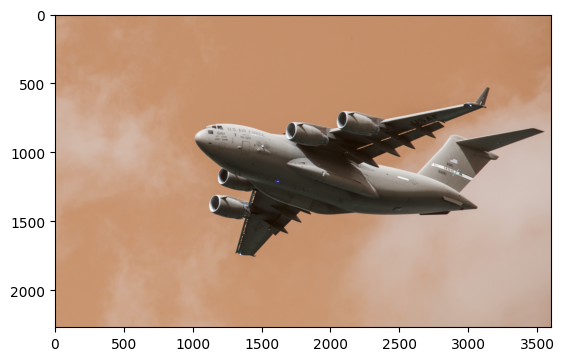

In [31]:
# opencv에서는 bgr color를 사용하므로 matplotlib에서 출력하려면 변환해야 함
plt.imshow(image_bgr)

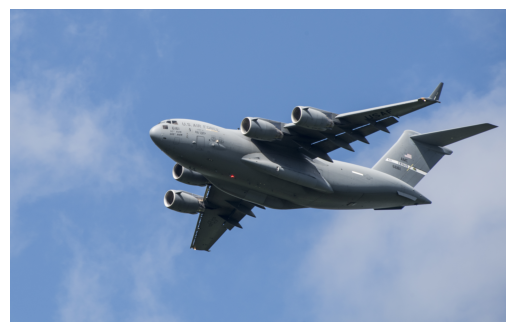

In [10]:
# BGR을 RGB로 변환
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
#                          원본         변환 옵션

# 이미지를 출력
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

In [11]:
# 이미지 저장

cv2.imwrite("c:/workspace3/data/images/plane_new.jpg", image)
#                         경로                         데이터

True

(50, 50)


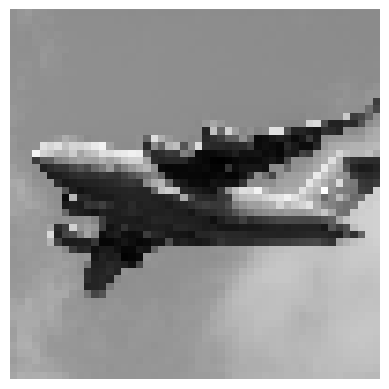

In [12]:
# 이미지 크기 변경

# 이미지 사이즈를 조절하는 이유
# 1. 다양한 사이즈의 이미지를 데이터 분석에 사용하려면 사이즈를 통일해야 함
# 2. 이미지 크기를 줄여서 메모리 사용량을 줄일 수 있음

# 흑백 이미지로 로드
image = cv2.imread("c:/workspace3/data/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 이미지 크기를 50x50 픽셀로 변환
image_50x50 = cv2.resize(image, (50, 50))
#                        원본    가로, 세로
print(image_50x50.shape)

# 이미지를 출력
plt.imshow(image_50x50, cmap="gray")
plt.axis("off")
plt.show()

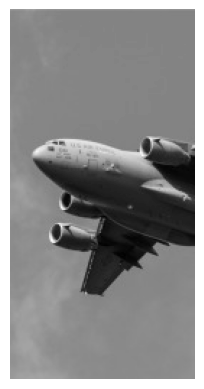

In [14]:
# 이미지 자르기

# 흑백 이미지로 로드
image = cv2.imread("c:/workspace3/data/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 열의 처음 절반과 모든 행을 선택
image_cropped = image[:,:128]
#                    [행,열]

# 이미지를 출력
plt.imshow(image_cropped, cmap="gray")
plt.axis("off")
plt.show()

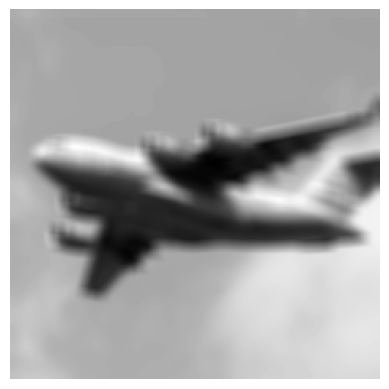

In [33]:
# 이미지 흐리게 하기

# 이미지를 흐리게 하려면 각 픽셀을 주변 픽셀의 평균값으로 변환

# 흑백 이미지로 로드
image = cv2.imread("c:/workspace3/data/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 이미지를 흐리게
# 커널 사이즈 10x10, 커널 사이즈가 클수록 이미지가 더 부드러워지게 됨
image_blurry = cv2.blur(image, (10,10))

# 이미지를 출력
plt.imshow(image_blurry, cmap="gray"), plt.axis("off")
plt.show()

In [17]:
# 커널을 만드는 방법

# 5x5 커널
kernel = np.ones((5,5)) / 25.0

# 커널의 값을 모두 더하면 1
print(sum(kernel.flatten()))

# 커널을 확인
print(kernel)

1.0000000000000002
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


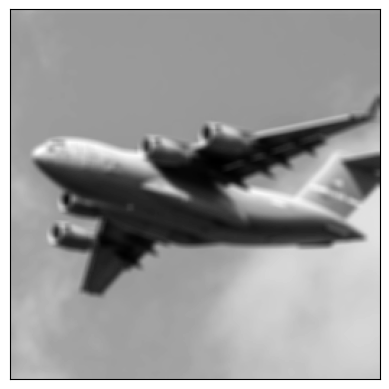

In [18]:
# 커널을 적용

#src: 이미지
#ddepth: 이미지 깊이(자료형 크기). -1이면 입력과 동일
#kernel: 커널 행렬

image_kernel = cv2.filter2D(image, -1, kernel)

# 이미지를 출력
plt.imshow(image_kernel, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

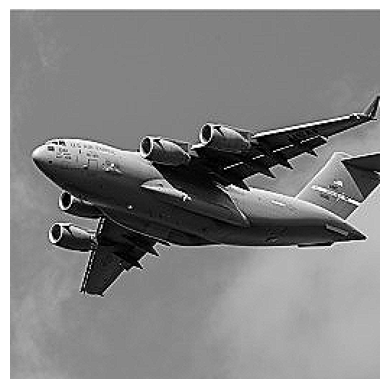

In [40]:
# 이미지를 선명하게 처리

# 흑백 이미지로 로드
image = cv2.imread("c:/workspace3/data/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 중앙 픽셀을 부각하는 커널
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

# 이미지를 선명하게 처리
image_sharp = cv2.filter2D(image, -1, kernel)

# 이미지를 출력
plt.imshow(image_sharp, cmap="gray"), plt.axis("off")
plt.show()

#이미지의 경계선에서 대비가 강조되게 됨

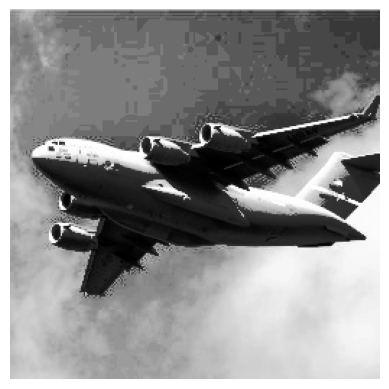

In [21]:
# 대비 향상

# 흑백 이미지로 로드
image = cv2.imread("c:/workspace3/data/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 이미지 대비를 향상시킴
image_enhanced = cv2.equalizeHist(image)
#                    히스토그램 평탄화

# 이미지를 출력
plt.imshow(image_enhanced, cmap="gray"), plt.axis("off")
plt.show()

(-12.8, 268.8, 0.0, 4559.1)

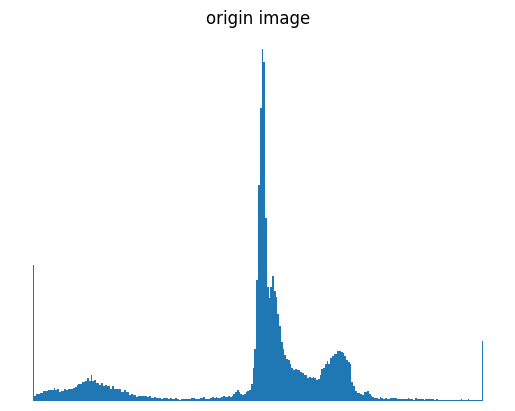

In [43]:
plt.hist(image_sharp.ravel(), 256, [0, 256])
#                    1차원
plt.title('origin image')
plt.axis("off")

(-12.8, 268.8, 0.0, 5076.75)

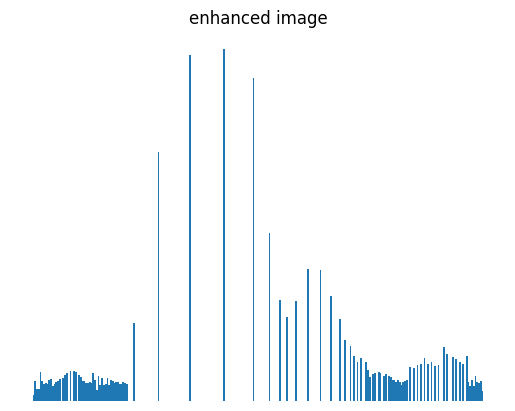

In [44]:
plt.hist(image_enhanced.ravel(), 256, [0, 256])
#                       1차원
plt.title('enhanced image')
plt.axis("off")

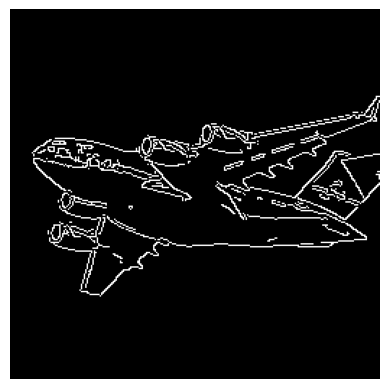

In [23]:
# 경계선 감지 : 경계선은 많은 정보가 담긴 영역

#정보가 적은 영역을 제거하고 대부분의 정보가 담긴 이미지 영역을 구분할 수 있음

# 흑백 이미지로 로드
image_gray = cv2.imread("c:/workspace3/data/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# 픽셀 강도의 중간값을 계산
median_intensity = np.median(image_gray)

# 중간 픽셀 강도에서 위아래 1 표준편차 떨어진 값을 임계값으로 지정
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

# 경계선 감지 함수를 적용
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

# 이미지를 출력
plt.imshow(image_canny, cmap="gray"), plt.axis("off")
plt.show()